<a href="https://colab.research.google.com/github/YonDraco/learn-deep-learning/blob/main/demo8_RidgeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

#### Creating Dataset
A simple dataset using numpy arrays

In [ ]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], 
                     [7.8], [8.9], [5.2], [4.59], [2.1], 
                     [8], [5], [7.5], [5], [4],
                     [8], [5.2], [4.9], [3], [4.7], 
                     [4], [4.8], [3.5], [2.1], [4.1]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], 
                     [3.3], [2.6], [1.96], [3.13], [1.76], 
                     [3.2], [2.1], [1.6], [2.5], [2.2], 
                     [2.75], [2.4], [1.8], [1], [2], 
                     [1.6], [2.4], [2.6], [1.5], [3.1]], 
                    dtype = np.float32)

#### View the data
There seems to be some relationship which can be plotted between x_train and y_train. A regression line can be drawn to represent the relationship

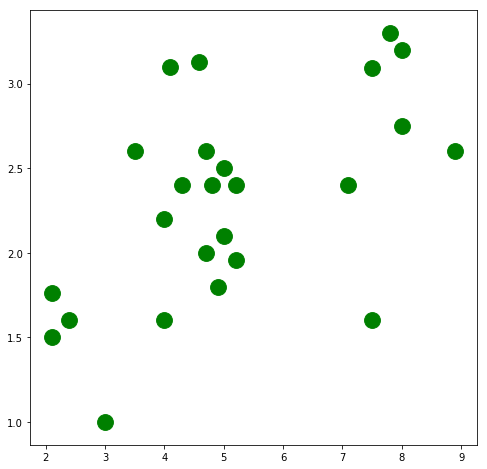

In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original data')

plt.show()

In [ ]:
import torch 

#### Converting data to pytorch tensors
By defualt requires_grad = False

In [ ]:
X_train = torch.from_numpy(x_train) 
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


#### Set the details for our neural network
Input, output and hidden layer sizes plus the learning rate

In [ ]:
input_size = 1 
hidden_size = 1
output_size = 1 
learning_rate = 0.001

#### Create random Tensors for weights and biases.<br>
Setting requires_grad=True indicates that we want to compute gradients with respect to these Tensors during the backward pass

In [ ]:
w1 = torch.rand(input_size, 
                hidden_size, 
                
                requires_grad=True)
w1.shape

torch.Size([1, 1])

In [ ]:
b1 = torch.rand(hidden_size, 
                output_size, 
                
                requires_grad=True)
b1.shape

torch.Size([1, 1])

In [ ]:
w1

tensor([[0.6612]], requires_grad=True)

In [ ]:
b1

tensor([[0.8730]], requires_grad=True)

In [ ]:
alpha = 0.8

## Training

#### Foward Pass:
* Predicting Y with input data X
* we use y = ax+b as its a regression problem

#### Finding Loss:
* Finding difference between Y_train and Y_pred by squaring the difference and then summing out, similar to nn.MSELoss and adding a penalty of L2 norm as it is ridge regression


#### For the loss_backward() function call:
* backward pass will compute the gradient of loss with respect to all Tensors with requires_grad=True. 
* After this call w1.grad and b1.grad will be Tensors holding the gradient of the loss with respect to w1 and b1 respectively.

#### Manually updating the weights
* weights have requires_grad=True, but we don't need to track this in autograd. So will wrap it in torch.no_grad
* reducing weight with multiple of learning rate and gradient
* manually zero the weight gradients after updating weights

In [ ]:
for iter in range(1, 5001):  
   
    y_pred = X_train.mm(w1).add(b1)
    
    ridge_regularization_penalty = (w1*w1)
    
    loss = ((y_pred - Y_train).pow(2).sum()) + (alpha * ridge_regularization_penalty) 
    
    if iter % 500 ==0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        
        w1.grad.zero_()
        b1.grad.zero_()

500 6.147125720977783
1000 6.1442108154296875
1500 6.144202709197998
2000 6.144202709197998
2500 6.144202709197998
3000 6.144202709197998
3500 6.144202709197998
4000 6.144202709197998
4500 6.144202709197998
5000 6.144202709197998


In [ ]:
print ('w1: ', w1)
print ('b1: ', b1)

w1:  tensor([[0.1735]], requires_grad=True)
b1:  tensor([[1.4123]], requires_grad=True)


#### Checking the output

Converting data into a tensor

In [ ]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[4.7000],
        [2.4000],
        [7.5000],
        [7.1000],
        [4.3000],
        [7.8000],
        [8.9000],
        [5.2000],
        [4.5900],
        [2.1000],
        [8.0000],
        [5.0000],
        [7.5000],
        [5.0000],
        [4.0000],
        [8.0000],
        [5.2000],
        [4.9000],
        [3.0000],
        [4.7000],
        [4.0000],
        [4.8000],
        [3.5000],
        [2.1000],
        [4.1000]])

#### Get the predicted values using the weights 
Using final weights calculated from our training in order to get the predicted values

In [ ]:
predicted_in_tensor = X_train.mm(w1).add(b1)
predicted_in_tensor

tensor([[2.2280],
        [1.8288],
        [2.7139],
        [2.6445],
        [2.1586],
        [2.7660],
        [2.9569],
        [2.3148],
        [2.2089],
        [1.7768],
        [2.8007],
        [2.2801],
        [2.7139],
        [2.2801],
        [2.1065],
        [2.8007],
        [2.3148],
        [2.2627],
        [1.9330],
        [2.2280],
        [2.1065],
        [2.2454],
        [2.0197],
        [1.7768],
        [2.1239]], grad_fn=<AddBackward0>)

#### Convert the prediction to a numpy array
This will be used to plot the regression line in a plot

In [ ]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.2280006],
       [1.8288374],
       [2.7139387],
       [2.644519 ],
       [2.1585813],
       [2.7660036],
       [2.9569077],
       [2.3147755],
       [2.2089105],
       [1.7767726],
       [2.8007135],
       [2.2800655],
       [2.7139387],
       [2.2800655],
       [2.1065164],
       [2.8007135],
       [2.3147755],
       [2.2627106],
       [1.932967 ],
       [2.2280006],
       [2.1065164],
       [2.2453558],
       [2.0197415],
       [1.7767726],
       [2.1238713]], dtype=float32)

#### Plotting
Our training has produced a rather accurate regression line

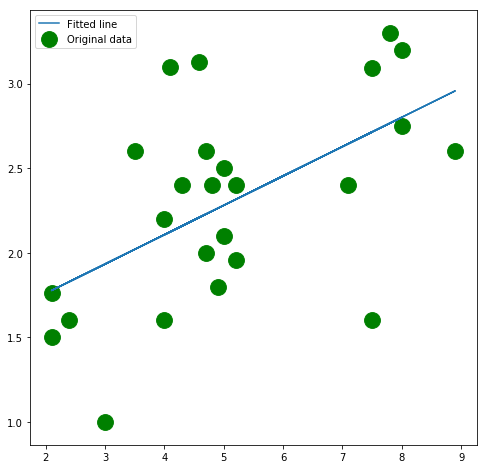

In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original data')

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend() 

plt.show()

#### We check the weights and biases with sklearn ridge regression to see if they match the weights and biases calculated by neural network

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

In [ ]:
ridge_reg = ridge_model.fit(x_train, y_train)

In [ ]:
print("w1 with sklearn is :", ridge_model.coef_)

w1 with sklearn is : [[0.17317088]]


In [ ]:
print("b1 with sklearn is :", ridge_model.intercept_) 

b1 with sklearn is : [1.4142637]


In [ ]:
predicted = ridge_reg.predict(x_train)

predicted

array([[2.2281668],
       [1.8298738],
       [2.7130454],
       [2.643777 ],
       [2.1588986],
       [2.7649965],
       [2.9554844],
       [2.3147523],
       [2.2091181],
       [1.7779225],
       [2.7996306],
       [2.280118 ],
       [2.7130454],
       [2.280118 ],
       [2.1069472],
       [2.7996306],
       [2.3147523],
       [2.2628012],
       [1.9337764],
       [2.2281668],
       [2.1069472],
       [2.2454839],
       [2.020362 ],
       [1.7779225],
       [2.1242642]], dtype=float32)

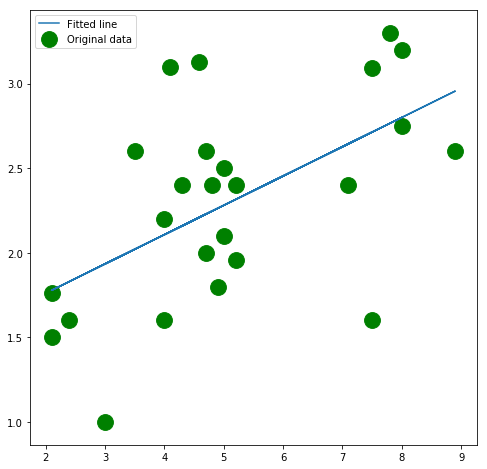

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original data')

plt.plot(x_train, predicted, label = 'Fitted line')

plt.legend() 

plt.show()